### ***This code was used to create Fig 6 adn S4***

#### ***Data Preparation***

In [322]:
import pandas as pd
import os
import re

folder_path = r"path of folder that was saved in the __Sampling Process__ file"

dfs = []

for f in os.listdir(folder_path):
    if f.endswith('.csv'):
        file_path = os.path.join(folder_path, f)
        df = pd.read_csv(file_path).iloc[:,1:]
        
        match = re.match(r'^(gcms\d+)_sample\.csv$', f)
        if match:
            number_of_gcms = match.group(1)
            df['number_of_gcms'] = number_of_gcms        
        dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

#### ***Fig S4***

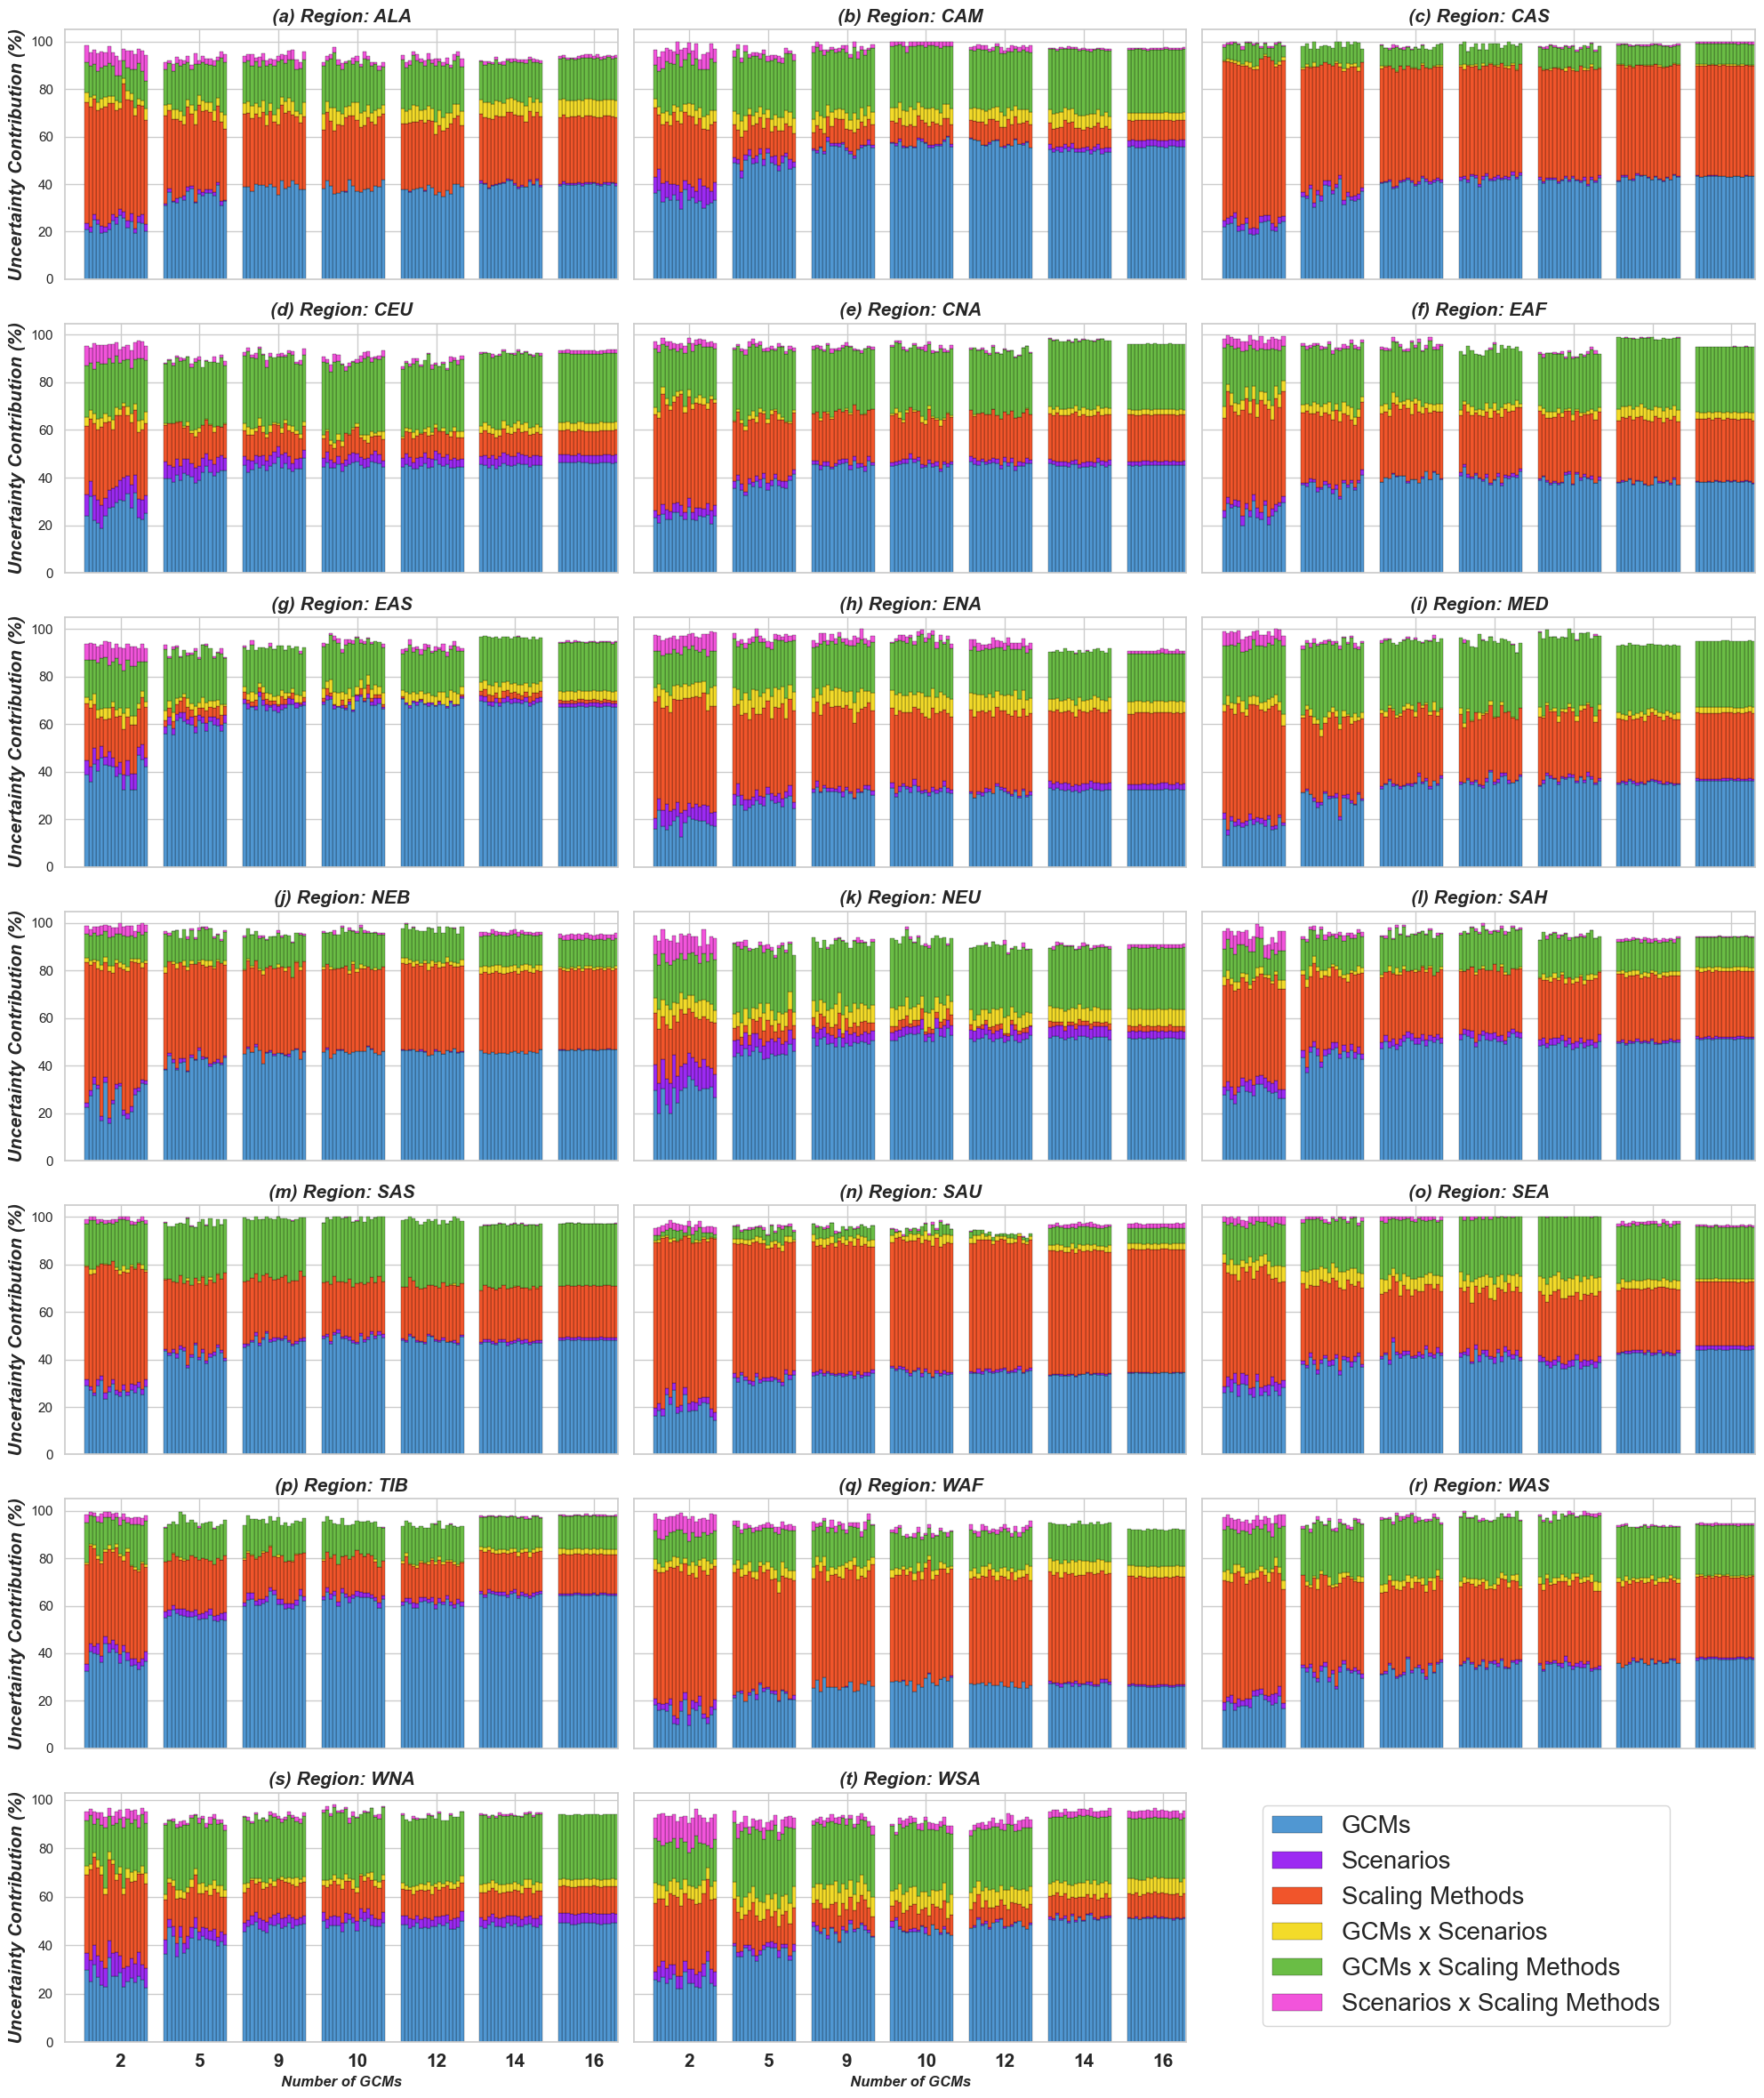

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

years = df["code"].unique()
elements_to_remove = ['AMZ', 'NAS', 'CGI', 'SSA', 'SAF', 'NAU']
years = years[~np.isin(years, elements_to_remove)]

def adjust_row(row):
    values = row[cols_to_adjust]
    total = values.sum()
    if total > 1:
        row[cols_to_adjust] = values / total
    return row

cols_to_adjust = ['gcm', 'scenario', 'method', 'gcm:scenario', 'gcm:method', 'scenario:method']
label_mapping = {
    "gcm": "GCMs",
    "scenario": "Scenarios",
    "method": "Scaling Methods",
    "gcm:scenario": "GCMs x Scenarios",
    "gcm:method": "GCMs x Scaling Methods",
    "scenario:method": "Scenarios x Scaling Methods"
}

filter_gcms = [2, 5, 9, 10, 12, 14, 16]

colors = ["#5097D2", "#9C2AF2", "#F1552B", "#F3DB29", "#6ABD45", "#F254DB"]
color_mapping = dict(zip(label_mapping.values(), colors))

fig, axs = plt.subplots(7, 3, figsize=(20, 25), sharex='col', sharey='row')
axs = axs.flatten()

handles, labels = [], []

for i, year in enumerate(years):
    if i >= len(axs):
        break 
    
    d = df[df['code'] == year].copy()
    d.drop(['code', 'pairs', 'gcm_T', 'scenario_T', 'method_T'], axis=1, inplace=True)
    d.iloc[:, :6] = d.iloc[:, :6].clip(lower=0)
    d = d.apply(adjust_row, axis=1)
    
    df_melted = pd.melt(d, id_vars=["number_of_gcms", "source_model"], 
                        value_vars=cols_to_adjust, 
                        value_name='uncert', var_name="sources")
    
    df_melted['num_gcms'] = df_melted['number_of_gcms'].str.extract('(\d+)').astype(int)
    df_melted = df_melted[df_melted['num_gcms'].isin(filter_gcms)]
    
    pivot_df = df_melted.pivot_table(index=['source_model', 'num_gcms'], 
                                     columns='sources', values='uncert', fill_value=0)
    pivot_df.iloc[:, 0:] = pivot_df.iloc[:, 0:] * 100

    pivot_df = pivot_df[cols_to_adjust]
    pivot_df.columns = [label_mapping[col] for col in pivot_df.columns]

    ax = axs[i]
    source_models = pivot_df.index.get_level_values(0).unique()
    bar_width = 0.8 / len(source_models)

    for j, model in enumerate(source_models):
        group_df = pivot_df.xs(model, level=0)
        colors_for_plot = [color_mapping.get(col, 'grey') for col in group_df.columns]
        p = group_df.plot(kind='bar', stacked=True, ax=ax, width=bar_width, 
                          position=j - (0.8 / len(source_models)) / 2, 
                          edgecolor='black', linewidth=0.2, legend=False,
                          color=colors_for_plot)
        if j == 0:
            handles, labels = ax.get_legend_handles_labels()

    ax.set_title(f'({chr(97 + i)}) Region: {year}', fontsize=15, style="italic", fontweight="bold")
    
    if i % 3 == 0:
        ax.set_ylabel('Uncertainty Contribution (%)', fontsize=15, style="italic", fontweight="bold")

    ax.set_xlabel('Number of GCMs', fontsize=12, fontweight='bold', style='italic')
    
    xticks = range(len(filter_gcms))
    ax.set_xticks(xticks)
    ax.set_xticklabels(filter_gcms, rotation=0, fontsize=15, fontweight='bold')

    tick_positions = [tick - 0.3 for tick in xticks]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(filter_gcms, rotation=0, fontsize=15)

fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.95, 0.03), ncol=1, prop={'size': 20})

for j in range(len(years), len(axs)):
    fig.delaxes(axs[j])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Adjust and display the final layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("save_path", dpi=300)
plt.show()


#### ***Fig 6***

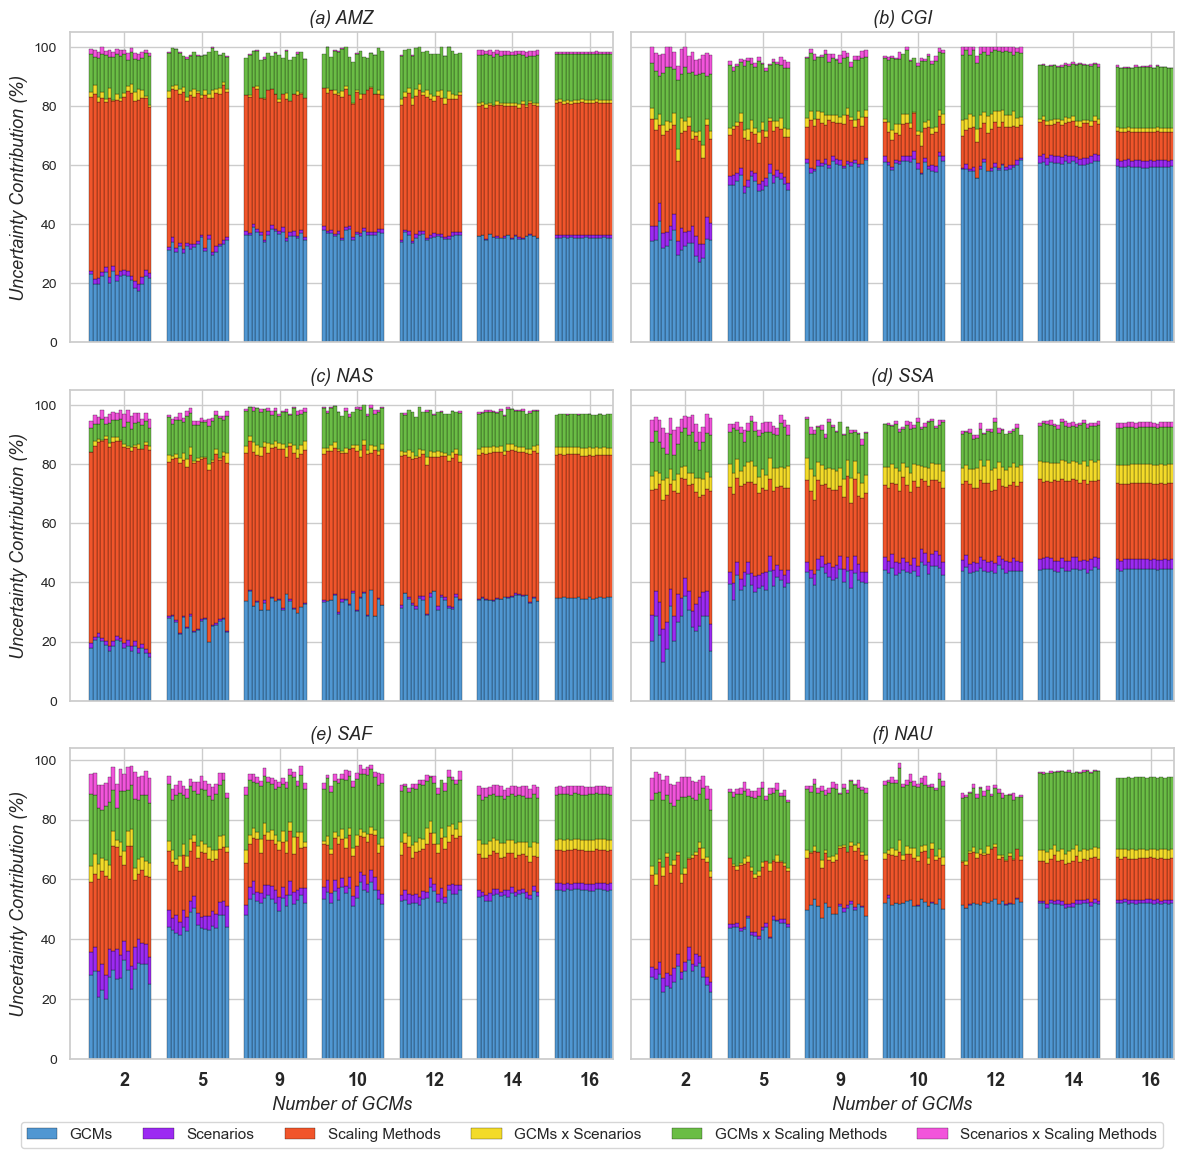

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def adjust_row(row):
    values = row[cols_to_adjust]
    total = values.sum()
    if total > 1:
        row[cols_to_adjust] = values / total
    return row

cols_to_adjust = ['gcm', 'scenario', 'method', 'gcm:scenario', 'gcm:method', 'scenario:method']
label_mapping = {
    "gcm": "GCMs",
    "scenario": "Scenarios",
    "method": "Scaling Methods",
    "gcm:scenario": "GCMs x Scenarios",
    "gcm:method": "GCMs x Scaling Methods",
    "scenario:method": "Scenarios x Scaling Methods"
}

filter_gcms = [2, 5, 9, 10, 12, 14, 16]

colors = ["#5097D2", "#9C2AF2", "#F1552B", "#F3DB29", "#6ABD45", "#F254DB"]
color_mapping = dict(zip(label_mapping.values(), colors))

fig, axs = plt.subplots(3, 2, figsize=(12, 12), sharex='col', sharey='row')

axs = axs.flatten()

handles, labels = [], []

years = df["code"].unique()
elements_to_remove = ['AMZ', 'NAS', 'CGI', 'SSA', 'SAF', 'NAU']
years_to_plot = years[np.isin(years, elements_to_remove)]
num_years = len(years_to_plot)
num_subplots = len(axs)

subplot_labels = ['AMZ', 'CGI', 'NAS', 'SSA', 'SAF', 'NAU']

for i, (year, label) in enumerate(zip(years_to_plot, subplot_labels)):
    if i >= num_subplots:
        break  
    
    d = df[df['code'] == year].copy()
    
    d.drop(['code', 'pairs', 'gcm_T', 'scenario_T', 'method_T'], axis=1, inplace=True)
    
    d.iloc[:, :6] = d.iloc[:, :6].clip(lower=0)
    
    d = d.apply(adjust_row, axis=1)
    
    df_melted = pd.melt(d, id_vars=["number_of_gcms", "source_model"], 
                        value_vars=cols_to_adjust, 
                        value_name='uncert', var_name="sources")
    
    df_melted['num_gcms'] = df_melted['number_of_gcms'].str.extract('(\d+)').astype(int)
    
    df_melted = df_melted[df_melted['num_gcms'].isin(filter_gcms)]
    
    pivot_df = df_melted.pivot_table(index=['source_model', 'num_gcms'], 
                                     columns='sources', values='uncert', fill_value=0)
    pivot_df.iloc[:, 0:] = pivot_df.iloc[:, 0:] * 100
    
    pivot_df = pivot_df[cols_to_adjust]
    pivot_df.columns = [label_mapping[col] for col in pivot_df.columns]
    
    ax = axs[i]
    source_models = pivot_df.index.get_level_values(0).unique()
    bar_width = 0.8 / len(source_models)
    
    for j, model in enumerate(source_models):
        group_df = pivot_df.xs(model, level=0)
        colors_for_plot = [color_mapping.get(col, 'grey') for col in group_df.columns]
        p = group_df.plot(kind='bar', stacked=True, ax=ax, width=bar_width, 
                          position=j - (0.8 / len(source_models)) / 2, 
                          edgecolor='black', linewidth=0.2, legend=False,
                          color=colors_for_plot)
        if j == 0:
            handles, labels = ax.get_legend_handles_labels()
    
    ax.set_title(f'({chr(97 + i)}) {label}', fontsize=13, style="italic")
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    if i % 2 == 0:
        ax.set_ylabel('Uncertainty Contribution (%)', fontsize=13, style="italic")
    ax.set_xlabel('Number of GCMs', fontsize=13, style='italic')
    xticks = range(len(filter_gcms))
    ax.set_xticks(xticks)
    ax.set_xticklabels(filter_gcms, rotation=0, fontsize=12, fontweight='bold')
    tick_positions = [tick - 0.3 for tick in xticks]  
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(filter_gcms, rotation=0, fontsize=13)

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol = 6,  prop={'size': 11})

for j in range(num_years, len(axs)):
    fig.delaxes(axs[j])

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Adjust and display the final layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("save_path", dpi=300)
plt.show()
